In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from prophet import Prophet

In [2]:
#load data
df = pd.read_csv('JTM_inbound_Asian_visitors.csv')

In [3]:
df.shape

(60, 2)

In [4]:
#remove white space contains in columns
df.columns = df.columns.str.replace(' ', '')

In [5]:
df.head()

,Date,Visitors
0,1/1/14,766525
1,2/1/14,722395
2,3/1/14,823804
3,4/1/14,959222
4,5/1/14,884969


In [6]:
#Change column names into Prophet format
df = df.rename(columns={'Date':'ds', 'Visitors' :'y'})

#Change to Pandas datetime format
df['ds'] = pd.to_datetime(df['ds'])
df['ds']=df['ds'] + pd.offsets.MonthEnd(0)

In [7]:
#print first five rows
df.head()

,ds,y
0,2014-01-31,766525
1,2014-02-28,722395
2,2014-03-31,823804
3,2014-04-30,959222
4,2014-05-31,884969


Text(0.5, 1.0, 'Trend of Asian visitors to Japan [2014 - 2018]')

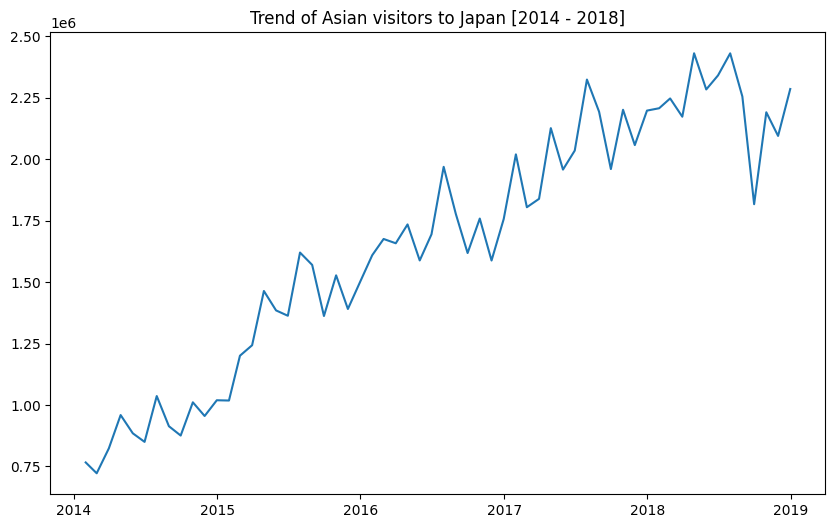

In [8]:
#Plot No.of Asian Visitors to Japan
plt.figure(figsize=(10,6))
plt.plot(df.set_index('ds'))
plt.title('Trend of Asian visitors to Japan [2014 - 2018]')

In [9]:
#fit with Prophet model
model = Prophet(weekly_seasonality=False, yearly_seasonality=True)
model.fit(df);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1n4djwhk/xv28mn7f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1n4djwhk/elu414sz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43374', 'data', 'file=/tmp/tmp1n4djwhk/xv28mn7f.json', 'init=/tmp/tmp1n4djwhk/elu414sz.json', 'output', 'file=/tmp/tmp1n4djwhk/prophet_modelymzsxdaj/prophet_model-20230713141830.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:18:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:18:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
future = model.make_future_dataframe(periods= 12, freq='m')

In [11]:
forecast = model.predict(future)

In [12]:
len(forecast)

72

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
67,2019-08-31,2.429742e+06,2.346455e+06,2.514769e+06
68,2019-09-30,2.182104e+06,2.098975e+06,2.267621e+06
69,2019-10-31,2.401968e+06,2.312422e+06,2.487801e+06
70,2019-11-30,2.303431e+06,2.216850e+06,2.389377e+06
71,2019-12-31,2.398448e+06,2.305074e+06,2.486422e+06


## Visualization

(15993.0, 18369.0)

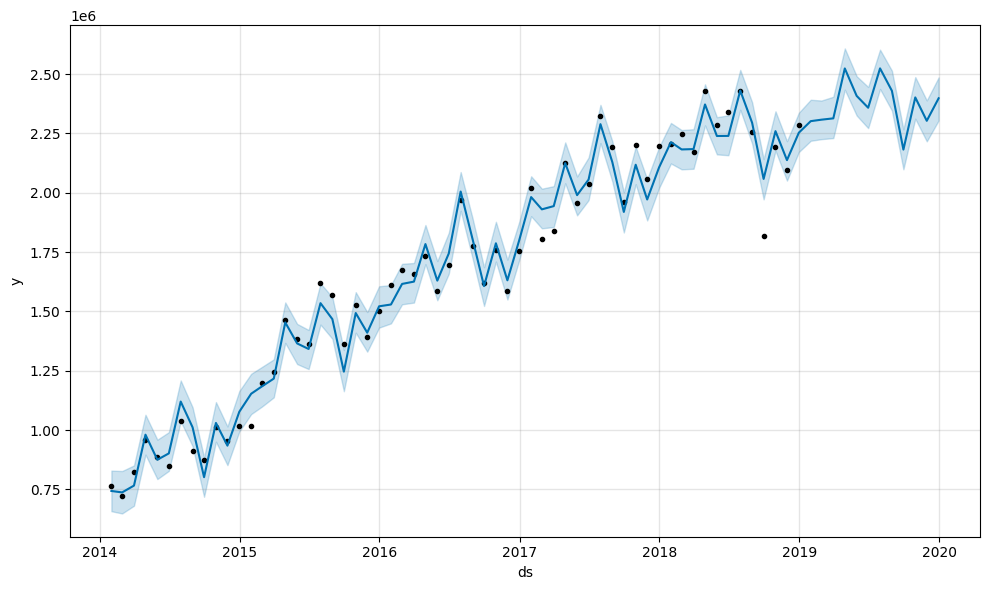

In [14]:
fig = model.plot(forecast);
#a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.xlim()

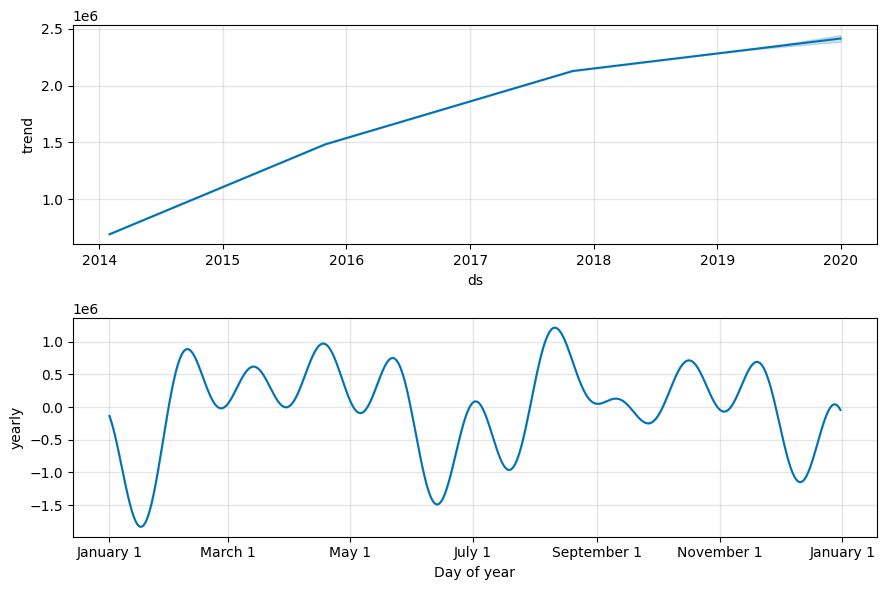

In [15]:
model.plot_components(forecast);

In [16]:
from prophet.diagnostics import cross_validation
cutoffs = pd.date_range(start='2016-06-30', end='2017-12-31', freq='2MS')
df_cv = cross_validation(model, cutoffs=cutoffs, horizon='365 days')

  0%|          | 0/9 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1n4djwhk/dsvjdhnx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1n4djwhk/iuo5xlbj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82082', 'data', 'file=/tmp/tmp1n4djwhk/dsvjdhnx.json', 'init=/tmp/tmp1n4djwhk/iuo5xlbj.json', 'output', 'file=/tmp/tmp1n4djwhk/prophet_model27mep8ch/prophet_model-20230713141831.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1n4djwhk/vb_8p2bg.json
DEBUG:cmdstanpy:input tempfi

In [17]:
df_cv['yhat'] = df_cv['yhat'].astype(int)

In [18]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
103,2018-06-30,2330792,2.266207e+06,2.397493e+06,2341033,2017-11-01
104,2018-07-31,2564021,2.493736e+06,2.633410e+06,2430752,2017-11-01
105,2018-08-31,2456139,2.393854e+06,2.522374e+06,2255148,2017-11-01
106,2018-09-30,2295735,2.228005e+06,2.361755e+06,1817035,2017-11-01
107,2018-10-31,2462362,2.398142e+06,2.528682e+06,2191009,2017-11-01


In [19]:
from prophet.diagnostics import performance_metrics

In [20]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,58 days,1.163578e+10,107869.268106,95340.60,0.051946,0.049486,0.051026,0.300000
1,60 days,8.826852e+09,93951.328373,88808.40,0.044805,0.045068,0.045325,0.220000
2,61 days,9.858044e+09,99287.682348,95125.10,0.048158,0.048217,0.048975,0.140000
3,89 days,1.004399e+10,100219.732658,96829.10,0.049502,0.052004,0.050140,0.100000
4,90 days,1.110856e+10,105397.161843,101634.55,0.053059,0.052851,0.053510,0.083333


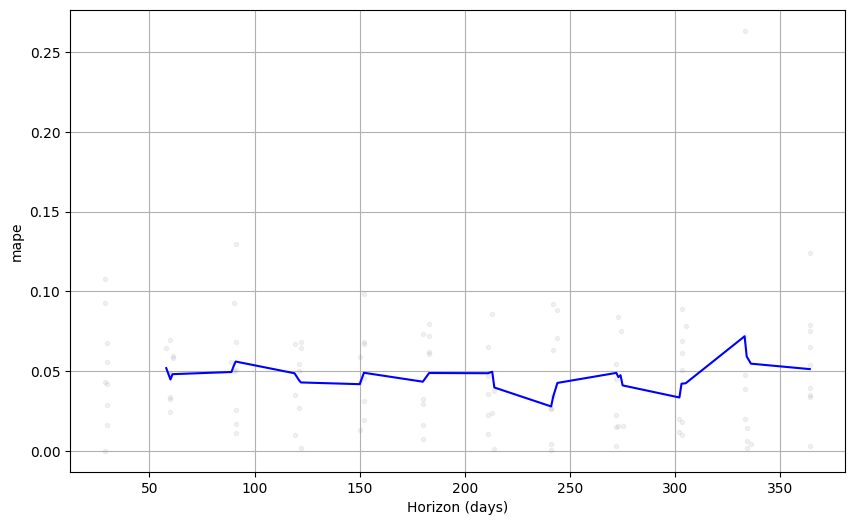

In [21]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')